<a href="https://colab.research.google.com/github/KFurudate/Midoribon/blob/main/chap8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 マルコフ連鎖モンテカルロ(MCMC)法とベイズ統計モデル


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
data_dir = "/content/drive/My Drive/Midoribon/input/"
data =  pd.read_csv(os.path.join(data_dir, 'chap8_data.csv'))

In [5]:
print(len(data))
data

20


,y,N
0,4,8
1,3,8
2,4,8
3,5,8
4,5,8
5,2,8
6,3,8
7,1,8
8,4,8
9,0,8


In [6]:
data.describe()

,y,N
count,20.000000,20.0
mean,3.650000,8.0
std,1.598519,0.0
min,0.000000,8.0
25%,3.000000,8.0
50%,4.000000,8.0
75%,5.000000,8.0
max,6.000000,8.0


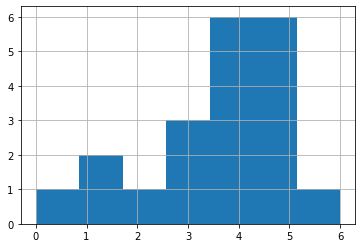

In [22]:
data.y.hist(bins=data.y.max()+1)
plt.show()

生存種子数$y_i$が二項分布に従うと仮定する
$$
p(y_i | q) = \binom{8}{y_i} q^{y_i} (1-q)^{8-y_i}
$$

尤度$L(q)$は、「データが得られる確率」の積
$$
L(q) = p({\bf{Y}}|q) = \prod_i p(y_i|q)
$$
両辺の対数を取ると、
$$
\log L(q) = \sum_i \{ y_i \log q +(8-y_i) log(1-q)\} + \bf{const}
$$

### ロジスティック回帰とロジットリンク関数

GLMは、確率分布・リンク関数・線形予測子を指定し、足し算の数式であらわされるモデル（線形モデル）。
ロジスティック回帰は、二項分布(確率分布)、ロジットリンク関数(リンク関数)を用いる。

$$
q_i = logistic (z_i) = \frac{1} {1+\exp(-z_i)}
$$

ziは、線形予測子で、 $z_i = \beta_1 + \beta_2 x_i + ...$

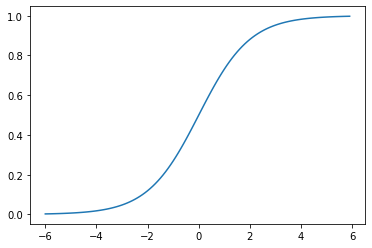

In [23]:
def sigmoid(zi):
    return 1 /(1+np.exp(-zi))

zi = np.arange(-6, 6, 0.1)
qi = sigmoid(zi)

plt.plot(zi, qi)
ｐｌｔ.show()

ロジット関数は、ロジスティック関数の逆関数である。

$$
logit(q_i)=\log \frac {q_i}{1-q_i}
$$

In [25]:
# # 二項分布に従うと仮定して、y=β1の線形予測子とロジットリンク関数でモデルを作成
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm('y + I(N-y)~ 1', data=data, family=sm.families.Binomial())
result = model.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM               AIC:            77.4957 
Link Function:      logit             BIC:            -28.1970
Dependent Variable: ['y', 'I(N - y)'] Log-Likelihood: -37.748 
Date:               2020-10-04 19:14  LL-Null:        -37.748 
No. Observations:   20                Deviance:       28.722  
Df Model:           0                 Pearson chi2:   24.5    
Df Residuals:       19                Scale:          1.0000  
Method:             IRLS                                      
---------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
---------------------------------------------------------------
Intercept   -0.1754    0.1587  -1.1054  0.2690  -0.4865  0.1356
==============================================================

"""

In [45]:
β1 = -0.1754	

In [46]:
#生存確率（データYのもとでの最尤推定値）
p = sigmoid(β1)
p

0.45626207623047454

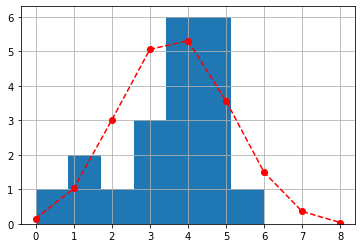

In [52]:
x = range(9)
binomial = stats.binom.pmf(x, 8, p)*20
plt.plot(x, binomial, "ro--")

data.y.hist(bins=data.y.max()+1)
plt.show()

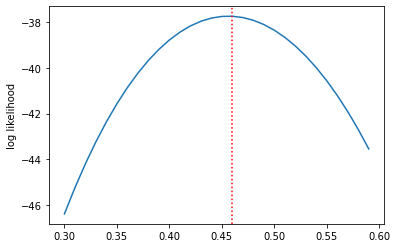

生存率 q: 0.46　で対数尤度が最大（最尤推定値）


In [148]:
Q = np.arange(0.3, 0.6, 0.01)
logL = []
for q in Q:
  logL.append(sum([stats.binom.logpmf(i, 8, q) for i in data.y]))
logL = np.array(logL)
plt.plot(Q, logL)
plt.axvline(Q[logL.argmax()], color='red', linestyle='dotted')

plt.ylabel("log likelihood")
plt.show()
print(f"生存率 q: {round(P[logL.argmax()], 2)}　で対数尤度が最大（最尤推定値）")